# Testing for Trends - Lab

## Introduction

In this lab, you'll practice your knowledge of testing for stationarity.

## Objectives

You will be able to:

- Use rolling statistics as a check for stationarity 
- Use the Dickey-Fuller test and conclude whether or not a dataset is exhibiting stationarity 

## Importing the data

Let's look at some new data. In this lab, we'll work with a time series in Python by using the popular [Air Passengers dataset](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv).

Start by running the cell below to import the necessary libraries. 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

The dataset is stored in `'passengers.csv'`. Import it and view the first five rows. 

In [2]:
# Import 'passengers.csv'
data = pd.read_csv('passengers.csv')

# View the first five rows
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Change the `'Month'` column over to a `datetime` type and make sure it is set as the index of the DataFrame. 

In [5]:
# Change the type of 'Month' to datetime
data['Month'] = pd.to_datetime(data['Month'])
# Set 'Month' as the index
data.set_index('Month', inplace = True)

In [6]:
# Check the index
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Now that we have successfully created a time series, we can use the `.plot()` method in pandas to visually inspect this time series.

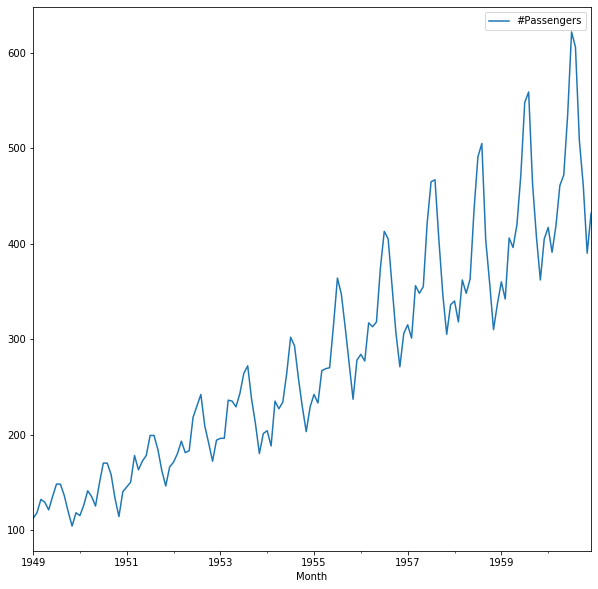

In [7]:
# Plot the time series data 
data.plot(figsize = (10,10))

Wec can see that that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences. Let's reconfirm this here using both **rolling statistics** and the **Dickey-Fuller test**.

## Rolling Statistics 

Use the `.rolling()` method to find the rolling mean and rolling std with a window of 12 months. Plot the original curve along with the rolling mean and standard error.

In [9]:
# Determine rolling statistics
roll_mean = data.rolling(window = 12, center = False).mean()
roll_std = data.rolling(window = 12, center = False).std()

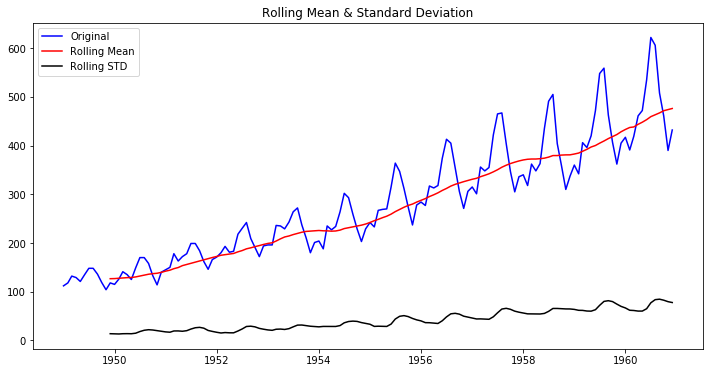

In [10]:
# Plot rolling statistics
fig = plt.figure(figsize=(12,6))
plt.plot(data, color = 'blue', label = 'Original')
plt.plot(roll_mean, color = 'red', label = 'Rolling Mean')
plt.plot(roll_std, color = 'black', label = 'Rolling STD')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

Though the variation in standard deviation is small, the mean is increasing with time and thus, this is not a stationary series. 

## Dickey-Fuller Test 

Use the Dickey-Fuller test to verify your visual result.

In [12]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test: \n')
dftest = adfuller(data['#Passengers'])

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test: 

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


## Summary

In this lab, you checked for the stationarity of a time series in Python. Next, we'll further explore stationarity and how to make sure to make time series stationary!